# **One Model For All The Tasks -- BLIP**

###### **BLIP -- BOOSTRAPPED LANGUAGE IMAGE PRE-TRAINING FOR UNIFIED VISION-LANGUAGE UNDERSTANDING AND GENERATION**

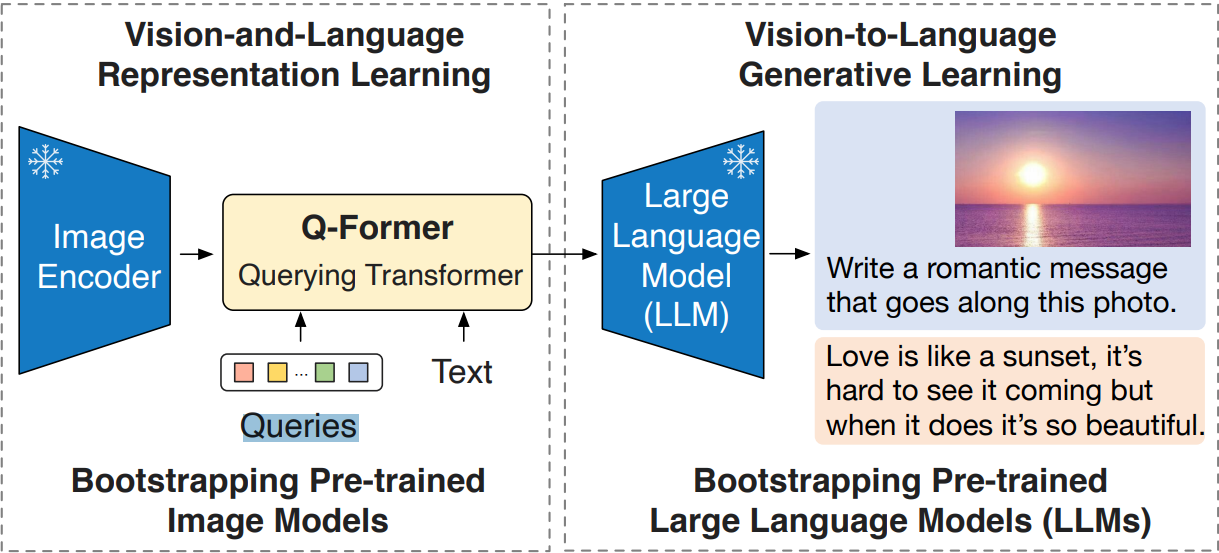

BLIP (Bootstrapped Language Image Pretraining) is an architecture designed for vision-language tasks that integrates both visual and textual data to perform tasks like image captioning, visual question answering, and more. The core idea behind BLIP is to utilize a multi-modal fusion mechanism that allows the model to effectively combine features from both image and text inputs, enabling better understanding and generation of content relevant to both modalities.

**BLIP** can be used :-

- Visual Question Answering
- Image-Text Retrieval
- Image Captioning




# **Image-Text Retrieval**

Image-text retrieval involves searching and retrieving relevant images based on textual queries or finding relevant text (captions, descriptions) based on an image query. It's a key task in the field of multi-modal AI, where systems are designed to understand and process more than one type of data at a time.

#### **Types of Image-Text Retrieval**

**Text-to-Image Retrieval** :- This involves providing a textual description or keywords as input, and the system retrieves image that match or are relevant to the provided text. For instance, if the query is "a sunny beach", the system should return images that visually represent abeach under sunny conditions.


**Image-to-Text Retrieval** :- Conversely, this involves providing an image as input, and the system retrieves text that describes or is relevant to the image. This might include captions, tags, or even full paragraphs that describe what is depicted in the image.

# **HOW DOES THE ARCHITECTURE BLIP ACTUALLY WORKS**

* **Image Encoder** :- BLIP uses Vision Transformer (ViT) as the image encoder. This encoder processes the input image through a series of transformer layers to generate a set of visual features. Each image is split into fixed-sized patches, linearly embedded, and then processed through the transformer network.  

* **Text Encoder** :- The text encoder in BLIP is also based on the transformer architecture. It takes textual input (such as captions or questions) and encodes it into textual features. The text is tokenied, embedded, and then passed through several layers of transformers to capture the linguistic context.

* **Cross-Modal Attention** :- This is a crucial component of the BLIP architecture where the fusion of modalities occurs. After obtaining the encoded features from both the image and text encoders, BLIP utilizes a mechanism called cross-modal attention. This process allows the model to attend to relevant parts of the image based on the textual content and vice versa. For instance, if the task is to answer a question about an image, the model can focus on the specific parts of the image that are relevant to the question.

* **Fusion Layers** :- Following the cross-modal attention, the features from both modalities are combined and passed through additional transformer layers. These fusion layers help to further integrate the information from both visual and textual features, allowing the model to generate a unified representation that captures the interplay between the image and text.

* **Pre-training and Fine-tuning :-** :- BLIP is pre-trained on large-scale datasets using a variety of tasks, such as masked language modeling, image-text matching, and contrasitive learning. These pre-training tasks are designed to help the model learn a robust multi-modal representation. After pre-training, BLIP can be fine-tined on specific downstream tasks like visual question answering or image captioning.

* **Output Heads** :- Depending on the specific task, BLIP can have different output heads that are attached to the fused representation. For example, a classification head for answering multiple-choce questions, or a generation head for creating text captions based on the image.

# **MODEL ARCHITECTURE**

Previous models had may obstacles to overcome, one of the most problem was how to obtain large volumes of image text pairs, one solution was using images accompanied by human annotated captions however this was very time and labor intensive and wasn't optimal to scale up. Another option to gather image-text pairs on the internet is via web scraping but this introduced noisy textual data into the model because captions don't necessarily accurately represent the image they're describing so this method also requires a lot of human intervention or remove noise from the dataset to solve this problem. The BLIP model introduces a noble filter module which is a mechanism that generates synthetic captions as well as filters both captions obtained from the internet and synthetic captions to reduce noise in a dataset. The second problem lies in the inherent task specific nature of the Trasformer Architecture, in general encoder based Transformers are used for classification and understanding based tasks where as on the other hand decoder based Transformers excel in generative related tasks. To create a unified model with capabilities of both understanding and generation the BLIP model introduces a multimodal mixture of encoder decoder models.

To be able to train/pre-trained such a model for understanding and generation tasks, the authors proposed a multi-modal Mixture of Encoder and Decoder that can integrate three functionalities as shown in the figure below.

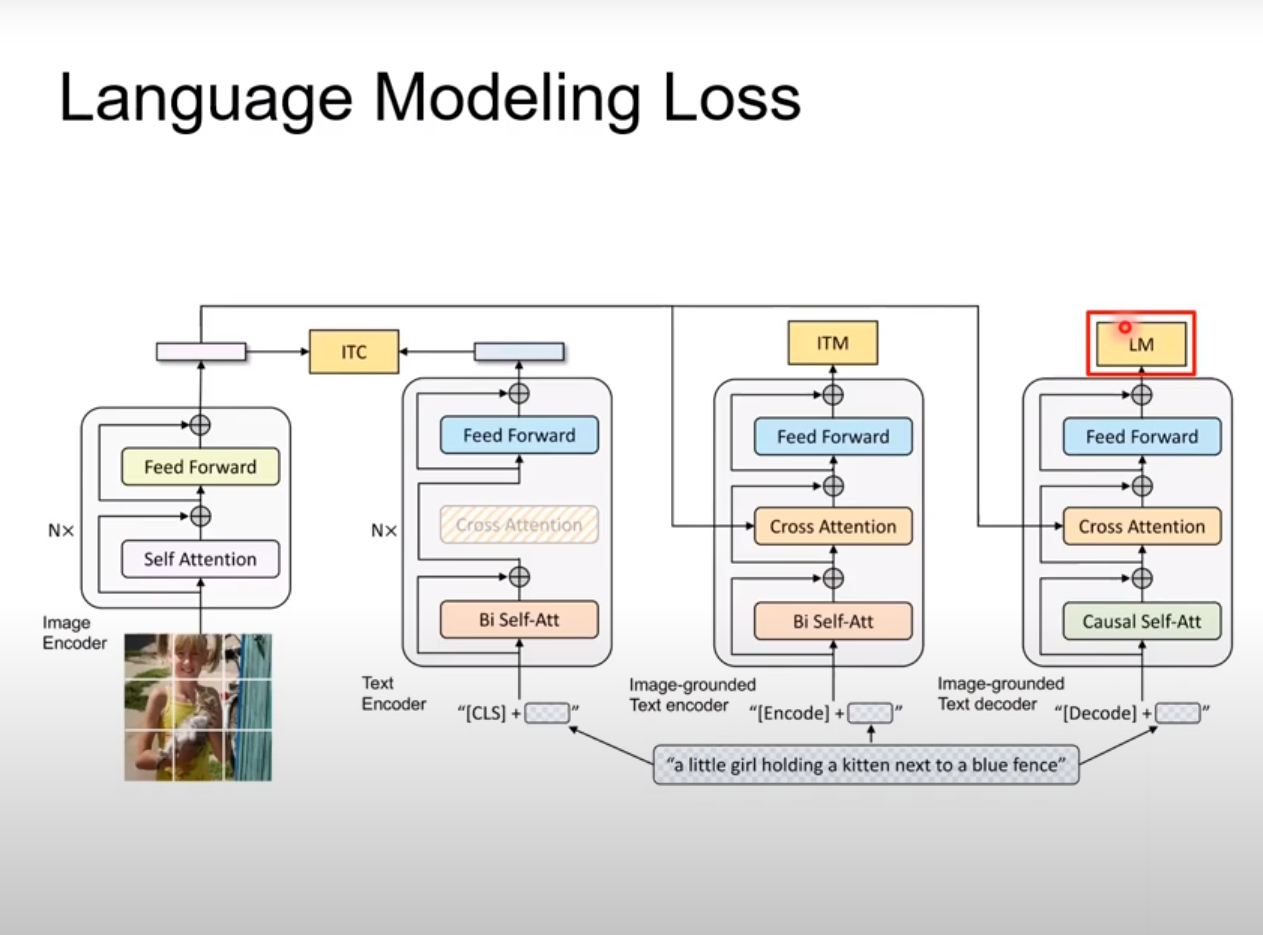






Figure :- Pre-training model architecture and objectives of BLIP (same parameters have the same color). The proposed multi-modal mixture of encoder-decoder, has three functionalities 1) Text Encoder (Unimodal encoder) is trained with an image-text contrastive (ITC) 2) Image-grounded text encoder uses additional cross attention layers to model vision-language interactions and is trained with an image-text matching (ITM) loss 3) image-ground text decoder replaces the bi-directional self-attention layers with causal self-attention layers, and shares the same cross-attention layers and feed forward networks as the encoder.

The first component of the model is the Vision Transformer which uses the same architecture from the paper "An image is worth 16*16 words". During forward pass each image is divided into 16*16 patches and then each one of those patches are flattened and stacked on top of each other and then an extra class token is prepended to the sample which represents the global image feature then positional encodings are added to each patch and the embedding features are passed to the self-attention. In this layer, using key, query, and value matrices, the self-attention scores for the samples are computed. The attention scores are then added back to the original embeddings via a skip connection and normalized across the layer. The normalized attention scores are then passed through a feed-forward layer, after which they are added back with the original attention scores and normalized again across the layer. The output of the Vision Transformer is linearly projected and will be used for all other components in the model.

The next component of the model is the textual transformer, this encoder uses the same as the pre-trained BERT model to encode the text samples. For each forward pass the tokens are embedded and like Vision Transformer a class token is prepended to the sequence, this token represents the summarization of the sentence.

Both the vision and text encoders share similar components but notice how the self attention layer used in the vision is changed with a bidirectional self attention layer in the text encoder which takes information from both the right and left sides of the tokens, which helps for improved token embeddings as well as improve feature representation.



# **Unimodal encoder**

The model encodes text and image as shown in the figure. The text encoder is the same as BERT that is Mask Language Model with a [CLS] token to append the beginning of the text input to summarize the sentence.

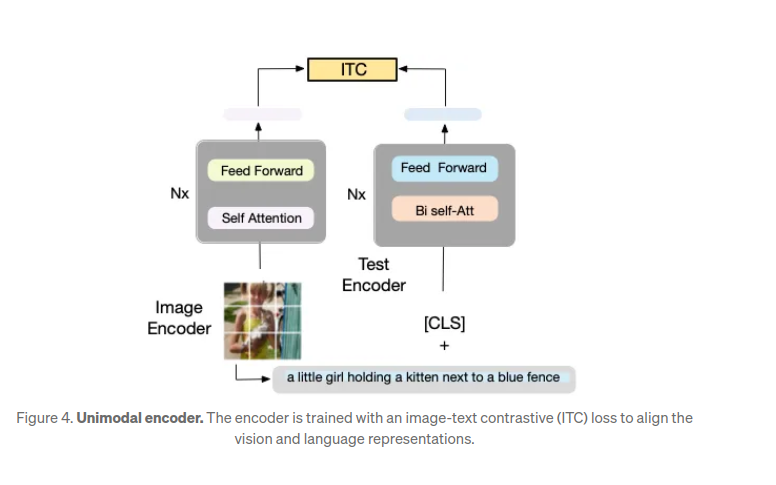

### **Contrasitive Pre-training**

For each text sample the output of this encoder is linearly projected to the vector of the same dimensionality of the vision Transformer output and this two outputs during backward pass, **"Image Text Contrast (ITC)"** loss is computed, this is computed between the vision and text encoder outputs to align each modality feature representation in a global feature space. The objective of contrasitive pre-training is to jointly train an image and text encoder such that the cosine similarity of the correct text image pair is maximized at the same time the cosine similarity of the disimilar image text pair should be minimized, this is accomplished by stacking all images in a batch on top of each other creating a matrix which is similarly done to the text samples.


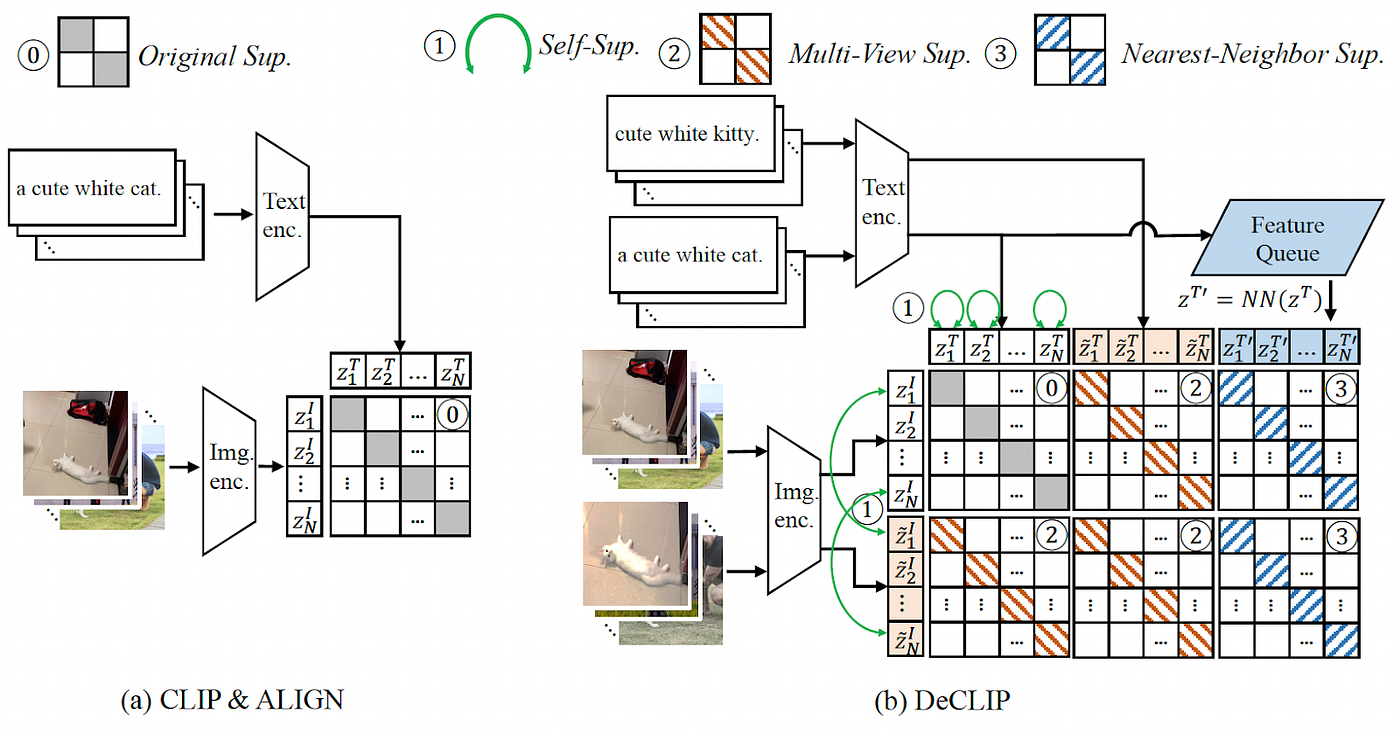

By multiplying the image matrix by the transpose of the text matrix a global feature space is computed where the diagonal side Matrix should represent interesection of each correct image X text pair, the cosine similarity in this diagonal should be maximized and the off diagonal elements should we have their similarities minimized.

### **Image-Ground Text Encoder**

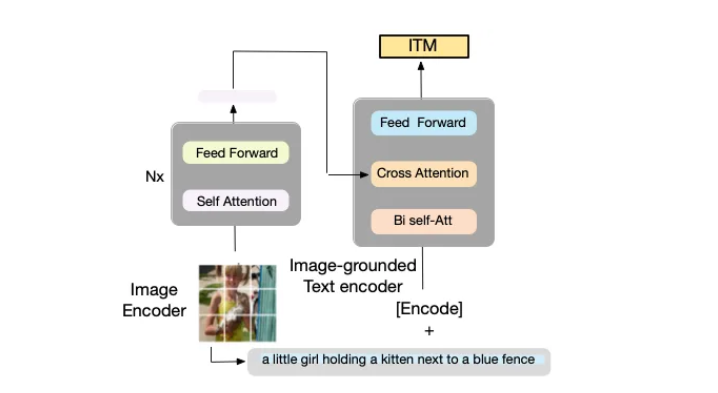

Image-grounded text encoder, The encoder uses additional cross-attention layers to model vision language interactions and trained with a image-text matching (ITM) loss to distinguish between positive and negative image-text pairs

The next component is the image-ground text encoder, this Transformer will later be used during fine-tuning as the filtering mechanism in the cap filter module. Similar to the previous text encoder, each word token is embedded and learnable. Additionally a learnable task specific token is prepended to the sequence. This token will be used as the output of the encoder to represent the multi-modal representation of both the text and image modalities. Again, this Transformer shares many of the same layers as the previous encoders, but notice the addition of the cross-attention layer, this layer takes the final query, and key matrices generated from Vision Transformer and calculates self attention scores using the value matrix of the image-text encoder. Essentially this injects visual information into attention scores of the image. The special tken is taken from the output and is used to calculate **image text match loss (ITM)**, which is a binary classification task(filter), during learning stage the model uses the prepended token as the Transformer head to predict whether each image-text pair is a positive, the pair is a match or a negative meaning the pair is not a match given the multi-modal feature represenation along with human annotated labels as an optimization strategy the model employs. A Hard negative mining strategy where the model identifies samples that got wrong  from the ITC loss and it re-introduces thosenegatives into the samples, this enables the model to distinguish between positive and negative examples better. During fine tuning this encoder will be used to find positive or matching image text pairs and filter out negative image text-pairs for both webcaptions and synthetic captions.     

### **Image Ground Text Decoder**

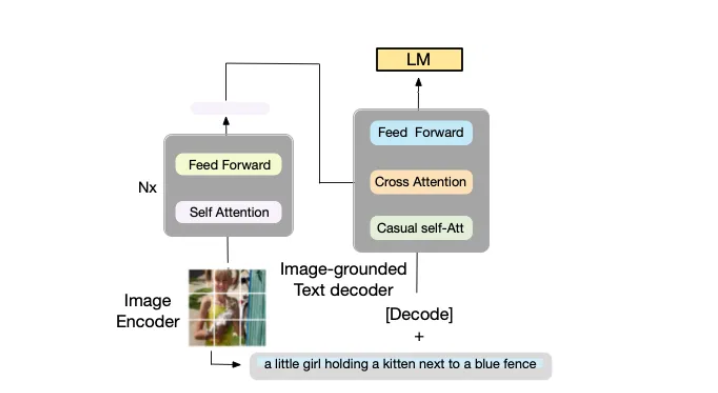

The image-ground text decoder, the decoder replaces the bi-directional self attention layers with causal self-attention layers, shares the same cross-attention layer, and feed-forward networks as the encoder. The decoder is trained with a language modeling (LM) loss to generate captions given images.

The final element of the model is the image ground text decoder, this will be used as autoregressive synthetic captioner in the cab filter module. The image-grounded text decoder employs Language Modeling Loss (LM). It activates the image grounded text decoder with the aim of generating textual descriptions given an image. The LM loss is trained to maximize the likelihood of the text in autoregressive manner. This Mask language modeling loss has already shown significant results in different models such as visual and language pre-training, to generate coherent captions.  

The output of the image ground encoder is used as the language modeling loss during training,the language modeling loss calculates the next token in a sequence using softmax, given an image and previous tokens in the sequence to decrease the certainity of the prediction.

Transformers are used to generate image captions. These synthetic captions often turn out to be more accurate than image texts obtained from the internet."



# **Caption Filtering and Generation**

The caption filtering systems main goal is to improve both the quality and quantity of the data. It does this by filtering out noisy data and providing higher quality synthetic captions. Here we can see this picture of a chocolate cake, the web caption for this picture is "Blue Sky Bakery in Sunset Park" and if the caption doesn't provide any usable data for the model, this is the kind of caption we consider noisy and we would want to have filtered out by the filtering system, the captioning system would then provide a caption, that's more descriptive like "Chocolate cake with cream frosting and chocolate sprinkles on top".

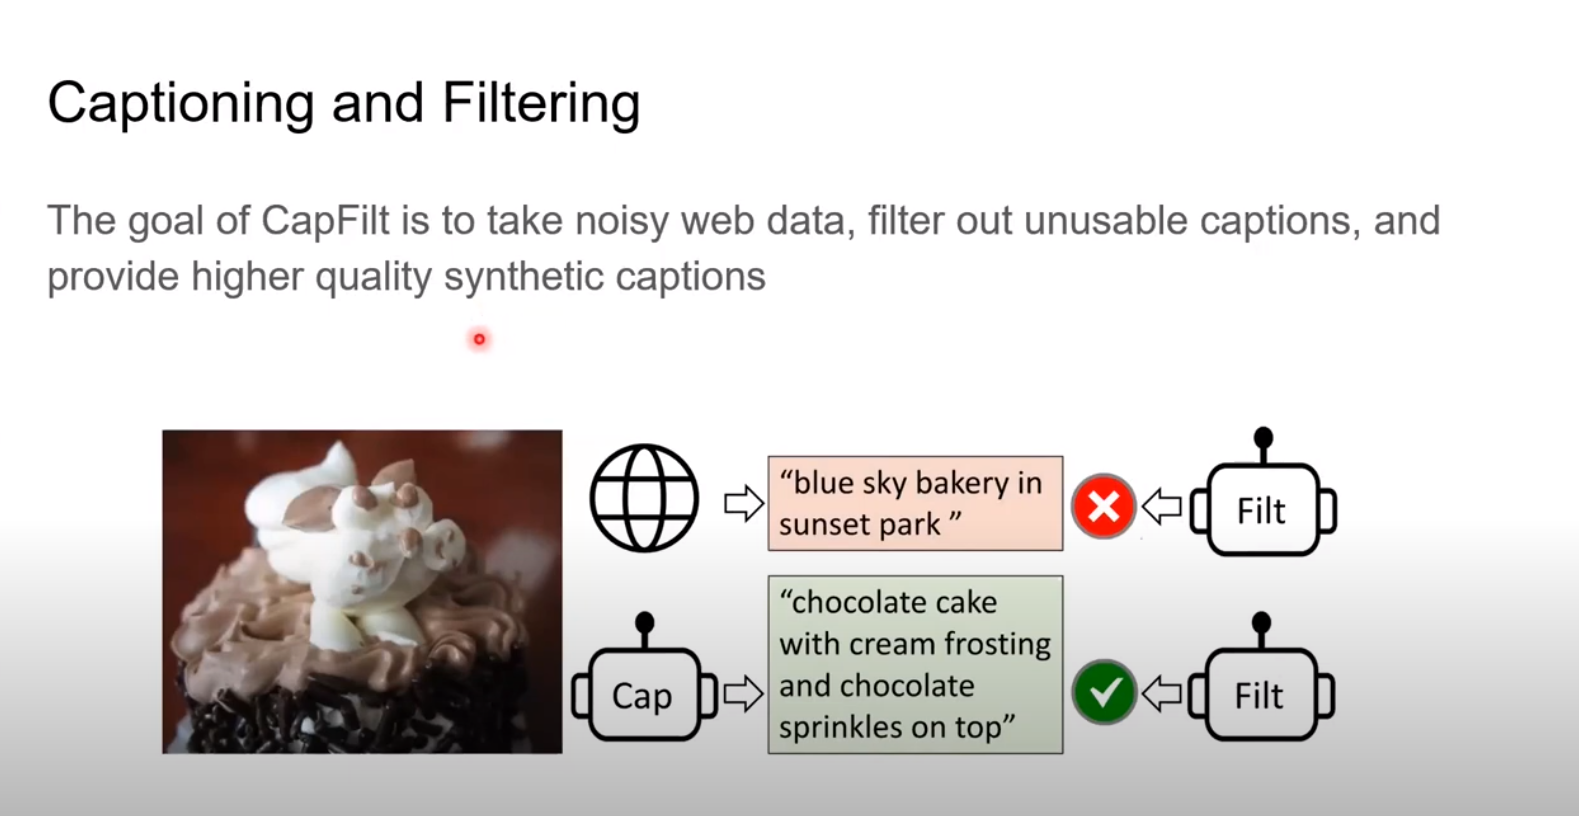

# **How Does Caption Filtering and Generation Works**

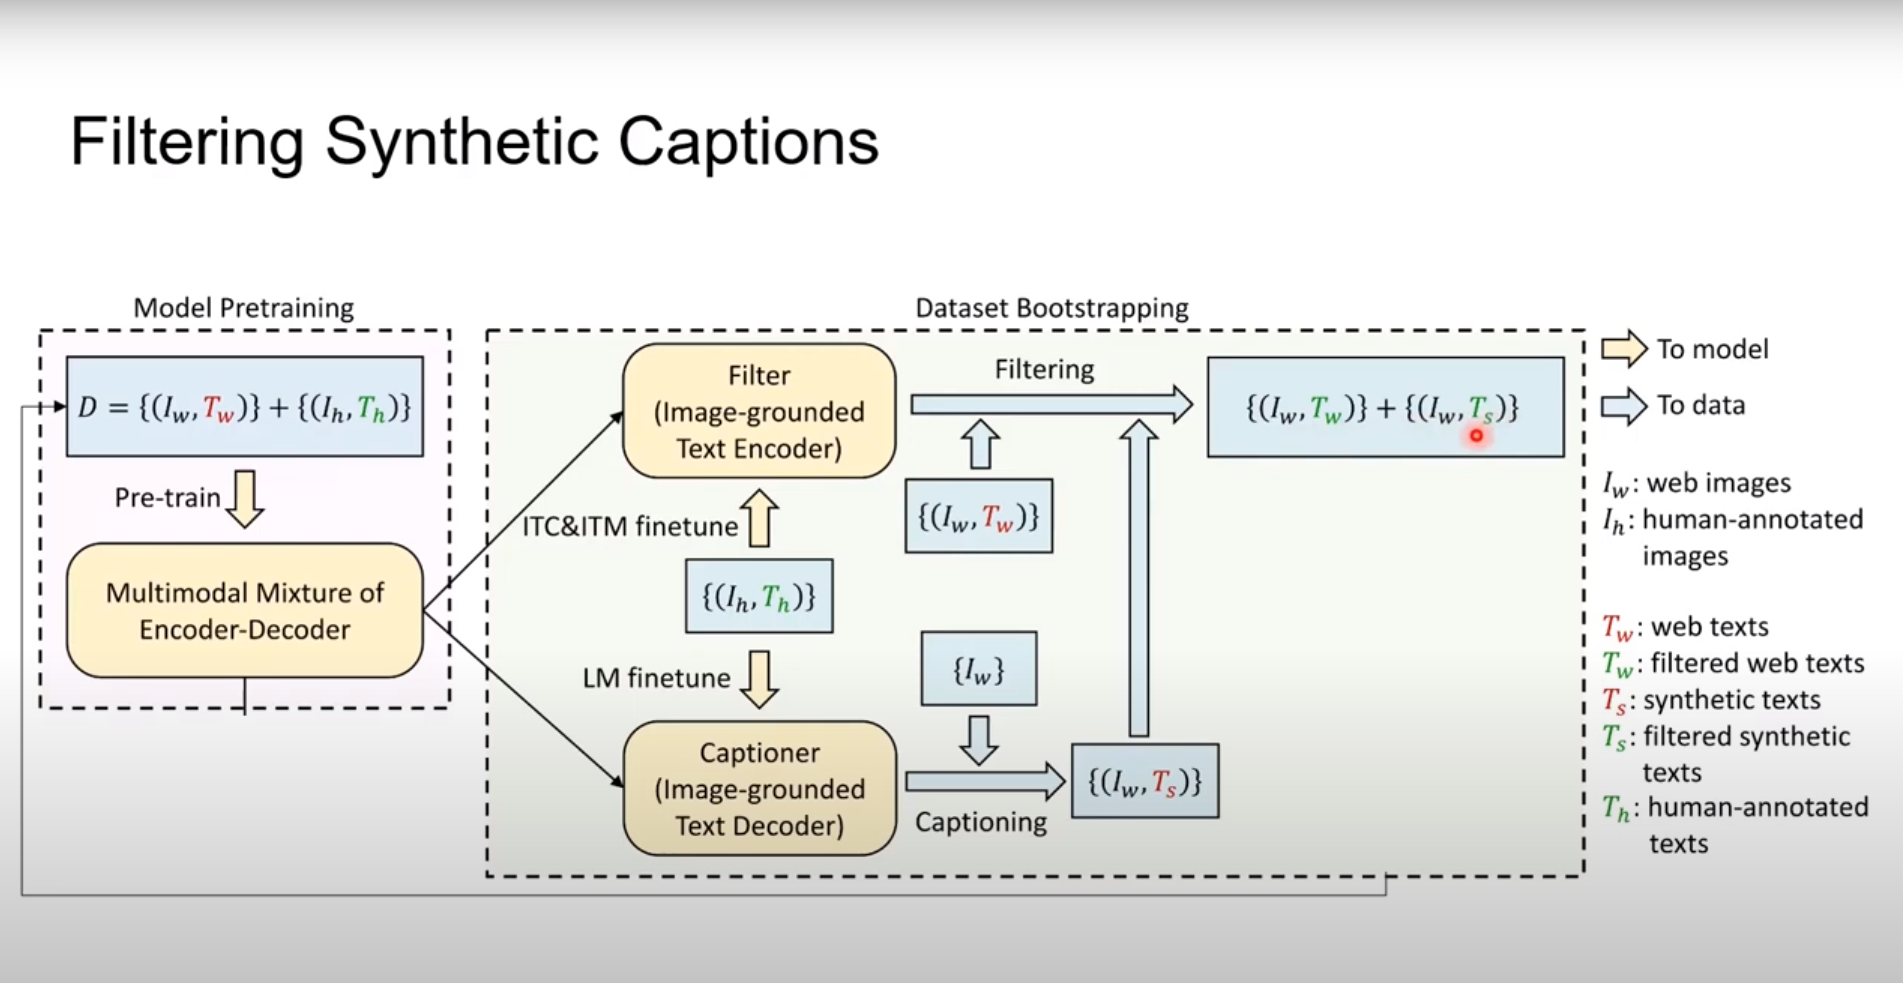

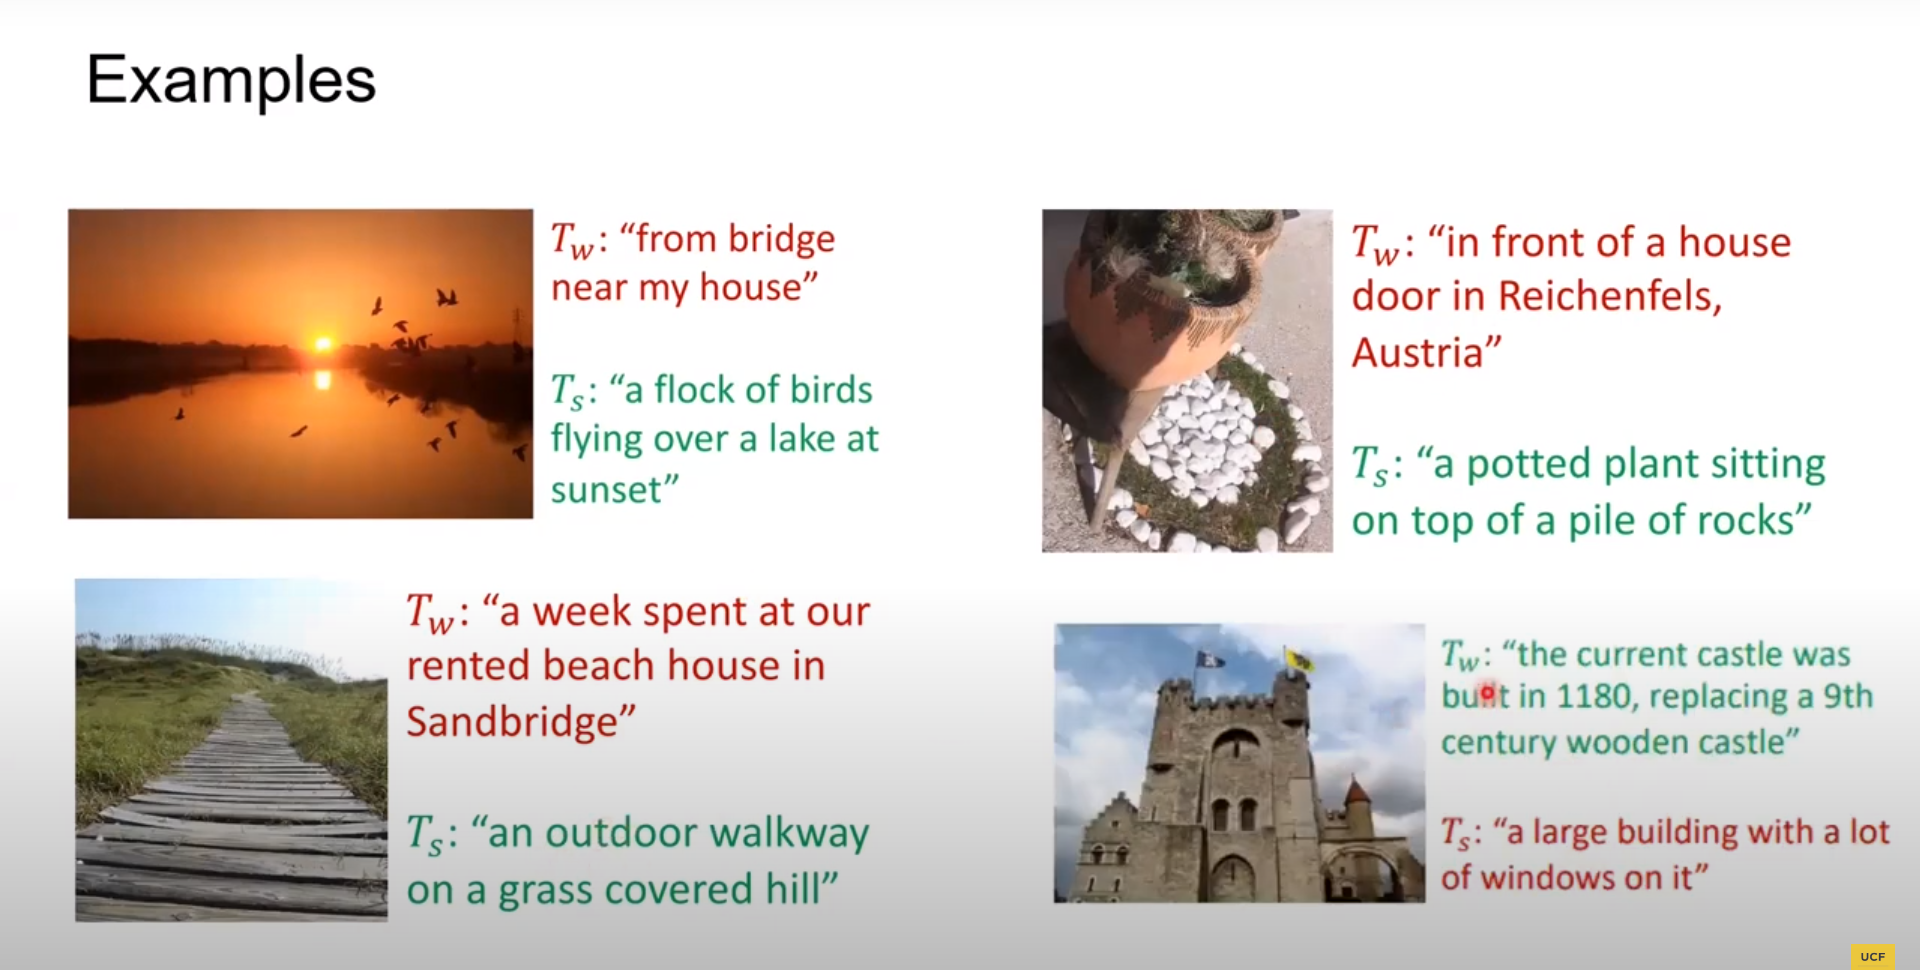

# **Caption Generation Using BLIP From Chest X-Ray**

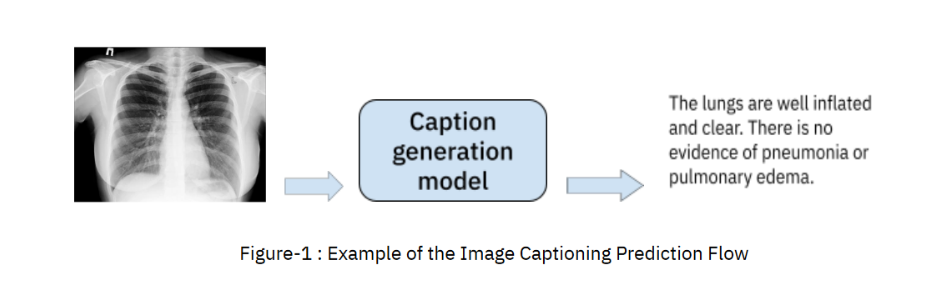

*   Train :- select ~1800 images
*   Test and Validation : Select ~200 images

In [ ]:
# install latest version of the library
!pip install -q datasets==2.13.1

In [ ]:
# Import important libraries
import pandas as pd
from datasets import load_dataset
from transformers
from transformers import BlipProcessor, BlipForImageTextRetrieval,BlipForConditionalGeneration, AutoProcessor
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transformers import Resize
import os
import gc
import numpy as np
import itertools
from tqdm import tqdm
import albumentations as A
import cv2
import shutil
import json
from PIL import Image
import requests
import matplotlib.pyplot as plt

In [ ]:
# Read CSV dataset from pandas
df_train = pd.read_csv('//kaggle/input/roco-dataset/all_data/train/radiologytraindata.csv', delimiter =
                       ,)
df_train.dataframeName = 'radiologytestdata.csv'
nRow, nCol = df_train.shape
print(f'There are {nRow} rows and {nCol} columns')

In [ ]:
# Display first 5 columns of dataframe
df_train.head()

In [ ]:
# Search those captiones which contains "Chest X-ray" words
mask = df_train['caption'].str.contains('chest x-ray' , case = False)
filtered_df= df_train[mask]
filtered_df.head()

In [ ]:
# Create "images" column to create full path for images
filtered_df['images'] = "/kaggle/input/roco-dataset/all_data/train/radiology/images/" + filtered_df['name']
filtered_df.head()

In [ ]:
# create new directory for training images
folder_path = "/kaggle/working/train"
if not os.path.exists(folder_path):
  os.mkdir(folder_path)

In [ ]:
# Iterate through the DataFrame and move the files to the destination folder
for index, row in filtered_df.iterrows():
  source_file = row["images"]
  file_name = os.path.basename(source_file)
  destination_file = os.path.join(folder_path, file_name)

  # use shutil.move() to move the file
  shutil.copy(source_file, folder_path)

In [ ]:
# Delete extra column from the data frame
filtered_df = filtered_df.drop(columns=["images", "id"])

In [ ]:
# Convert dataframe to json format
captions = filtered_df.apply(lambda row: {"file_name": row["name"], "text": row["caption"]}, axis=1).tolist()

In [ ]:
# Save data to json file
with open(folder_path + "/metadata.jsonl", 'w') as f:
    for item in captions:
        f.write(json.dumps(item))

# **Load the dataset**

In [ ]:
# Load dataset for training
dataset = load_dataset("imagefolder", data_dir = folder_path, split = "train")
dataset

# **Custom Class**

In [ ]:
# Create class for training

class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor, image_size=(224, 224)):
        self.dataset = dataset
        self.processor = processor
        self.image_size = image_size
        self.resize_transform = Resize(image_size)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        encoding = self.processor(images=item["image"], text=item["text"], padding="max_length", return_tensors="pt")
        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}
        return encoding

# **Load the Model**

In [ ]:
processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [ ]:
# Create dataset for training
image_size = (224,,224)
train_dataset = ImageCaptioningDataset(dataset, processor, image_size)
train_dataloader = DataLoader(train_dataset, shuffle= True, batch_size = 2)
train_dataloader

# **The optimizer**

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.train()

# **Training**

In [ ]:
%%time
# Start training
for epoch in range(5):
  print("Epoch:", epoch)
  for idx, batch in enumerate(train_dataloader):
    input_ids = batch.pop("input_ids").to(device)
    pixel_values = batch.pop("pixel_values").to(device)

    outputs = model(input_ids=input_ids,
                    pixel_values=pixel_values,
                    labels=input_ids)

    loss = outputs.loss

    #print("Loss:", loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

  print("Loss:", loss.item())

# **Save Training**

In [ ]:
#### Create save model path and save the trained model
saved_folder_path = "/kaggle/working/saved_model"
if not os.path.exists(saved_folder_path):
    os.mkdir(saved_folder_path)

model.save_pretrained(saved_folder_path)
processor.save_pretrained(saved_folder_path)

# **Load the trained model**

In [ ]:
### Load the trained model
load_model = BlipForConditionalGeneration.from_pretrained(saved_folder_path)
load_processor = AutoProcessor.from_pretrained(saved_folder_path)

# **Creating Test Dataset**

In [ ]:
# Creating Test Dataset

df_test = pd.read_csv('/kaggle/input/roco-dataset/all_data/test/radiology/testdata.csv', delimiter=',')
mask = df_test['caption'].str.contains('chest x-ray', case=False)
filtered_df = df_test[mask]
filtered_df.head()
filtered_df['images'] = "/kaggle/input/roco-dataset/all_data/test/radiology/images/" + filtered_df['name']
filtered_df.head()
folder_path = "/kaggle/working/test"
if not os.path.exists(folder_path):
    os.mkdir(folder_path)
# Iterate through the DataFrame and move the files to the destination folder
for index, row in filtered_df.iterrows():
    source_file = row["images"]
    file_name = os.path.basename(source_file)
    destination_file = os.path.join(folder_path, file_name)

    # Use shutil.move() to move the file
    shutil.copy(source_file, folder_path)

filtered_df = filtered_df.drop(columns=["images", "id"])
captions = filtered_df.apply(lambda row: {"file_name": row["name"], "text": row["caption"]}, axis=1).tolist()
# add metadata.jsonl file to this folder
with open(folder_path + "/metadata.jsonl", 'w') as f:
    for item in captions:
        f.write(json.dumps(item))
test_dataset = load_dataset("imagefolder", data_dir=folder_path, split="train")
test_dataset

# **Visual Question Answering**

A successfully trained and inferred medical Visual Question Answering (VQA) model represents a significant advancement in the field of healthcare and medical image analysis. Such a model combines computer vision and natural language processing to provide valuable insights and answers to medical professionals, researchers, and patients.

Have you ever wondered if computers could not only see but also understand what's in a picture and answer questions about it? That's exacty what the academic Visual Question Answering (VQA) field of research is all about. VQA involves teaching computers to connect the dots between images and langauges.


Visual Question Answering (VQA) is a task in computer vision that involves answering questions about an image. The goal of VQA is to teach machines to understand the content of an image and answer questions about it in natural language.

# **Approaches to VQA**

The methodologies in VQA can be written as follows:

*   Extract features from the question
*   Extract features from the image
*   Combine the features to generate an answer

When it comes to text features, methods like employing Bag-of-Words(BOW) or utilizing Long-Short-Term-Memory(LSTM) encoders are viable options. Regarding the image features instead, the commonly favored choice is to use pre-trained convolutional neural networks (CNN). As for answer generation, the prevalent approach often modeling the problem as a classification task.

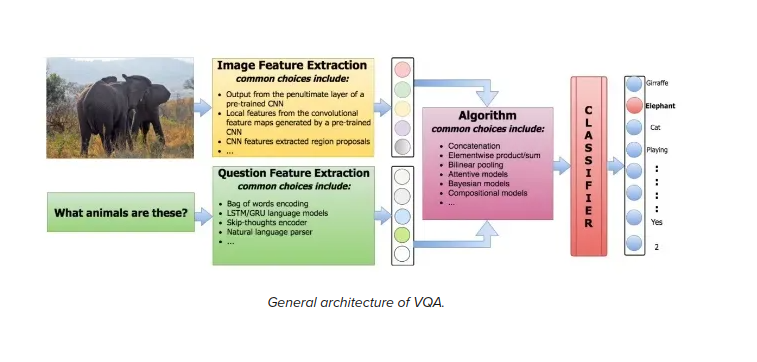


Hence, the primary distinction among various methodologies lies in the manner they integrate textual and image features. For instance, some approaches opt for a straightforward combination through concatenation, followed by input into a linear classifier. Conversely, others employ Bayesian models to to deduce the inherent relationships between the feature distribuitions of the question, image and answer.

# **1- Bayesian Approach**

The Bayesian approach introduces a distinctive framework centered on probabilistic VQA modeling. Unlike deterministic methods, Bayesian models assign probabilities to different outcomes, addressing the inherent uncertainties associated with both visual and linhuistic domains. This approach incorporates prior knowledge, leveraging pre-existing information about objects, scenes or relationships with in images. By doing so, it provides a more nuanced understanding, allowing the system to make informed decisions based on contextual familiarity.

One key strength of the Bayesian approach is its ability to quantify uncertainty. Instead of offering a singular answer, the model indicates the level of confidence or uncertainty associated with its response. This is particularly valuable in scenarios where the system may encounter ambiguous or complex queries.

Given that VQA involves the integration of visual and textual modalities, Bayesian models excel at inferring relationships between these two elements. The interconnectedness of visual content from images and linguistic content from questions is seamlessly navigated, contributing to a more comprehensive comprehension of the task.

An essential aspect of the Bayesian approach lies in effectively combining information sources. By considering the joint probability distribuition of features from both images and questions, the model generates answers that are not only contextually relevant but also reflective of the intricate interplay between different modalities.

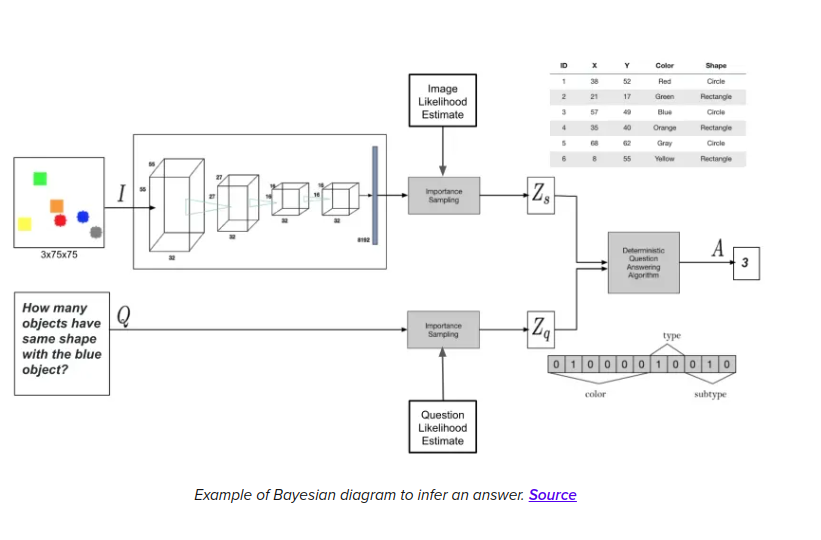



This dipicts a structured diagram that outlines the probabiistic model's process for inferring an answer to a given question about an image.

`Image Likelihood Estimate` :- A box plot indicates a statisical summary of the visual fatures extracted from an image, which likely represent the distribuition of certain attributes (such as size, color, or shape) with in the image

'`Importance sampling`' :- A flow chart component labeled "importance sampling" suggests the use of a samping technique to approximate the posterior distribuition, which combines prior knowledge and observed data.

'`Deterministic ALgorithm'` :- A module shows that in conjunction to probabilistic methods, there might be deterministic step or algortihm involved in the process.

'`Question Likelihood Estimate`':- Another box plot represents the likelihood of various aspects of the question, which probably encodes the distribuition of semantic features or possible intepretations of the question.

'`Integration and Answer`' :- The final answer is determined by integrating from the image and the question, using Bayesian inference to arrive at the most probable answer.

# **2- Attention-Based Approach**

Attention based approaches aim to guide the algorithm's focus towards the most crucial details to the input. Consider a question like "What color shirt is the refree wearing ?". In this case, the regions of the image containing the main character becomes more relevant than others, just as the words "color", "shirt", and "refree" hold more informative weight compared to the rest.

In Visual Question Answering,the prevalent strategy involves employing spatial attention to generate features specific to regions for training Convolutional Neural Networks. Determining the spatial regions of an image can be can be accomplished in various ways. One common method entails projecting a grid onto the image. Once applied, the significance of each region is assessed based on the specifics of the question.

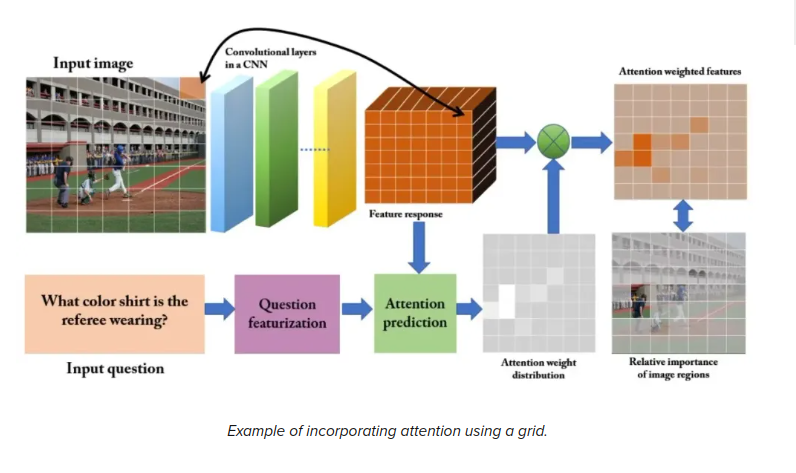

The image appears to describe an attention-based approach for visual question answering (VQA). This approach is designed to make a model focus on the most relevant parts of an image in response to a given question.

`Input Image and Question` :- An image and a related question are provided as inputs. For example, the question could be "what color shirt is the refree wearing ?"

`Convolutional Layers in a CNN` :- The image is processed through convolutional layers of a Convolutional Neural Network (CNN), which extract features from the image. These features are represented as activation maps that highlight different aspects of the image.

`'Feature Response'` :- The activations from the CNN provide a rich representation of the image, which includes a response for different features across the spatial dimension of the image.

`Question Featurizing` :- The question is also processed (featurized) to understand the context and focus required for the image features.

`Attention Prediction` :- Based on the processed question, the model predicts where to focus its attention on the image. This is shown as an attention wieght distribuition over the image features.

`Attention Prediction` :- The feature maps produced by the CNN (which contains spatial information about where features are located in the image) are combined with the attention weights. This modulation process effectively amplifies the signal fro regions that the model predicts are relevant while diminishing the signla from less relevant areas.

The distribuition of attention weights across the image can be visualized as a heatmap. This heatmap typically overlays the original image to show where the model is 'looking' to find answer to the question. Regions with higher attention weights are usually displayed with warmer colors (like red, indicating they have greater influence on the model's prediction)

`Relative Importance of Image Regions` :- Finally the weighted features and the heatmap give an intuitive representation of which parts of the image the model consider most relevant when trying to answer the question.










Another approach involves the automatic generation of bounding boxes for use in training the model. A bounding box  highlights a specific region of interest in an image. By proposing regions the question is them employed to evaluate the relevance of features for each, allowing for the selective extraction of information necessary to answer the question.

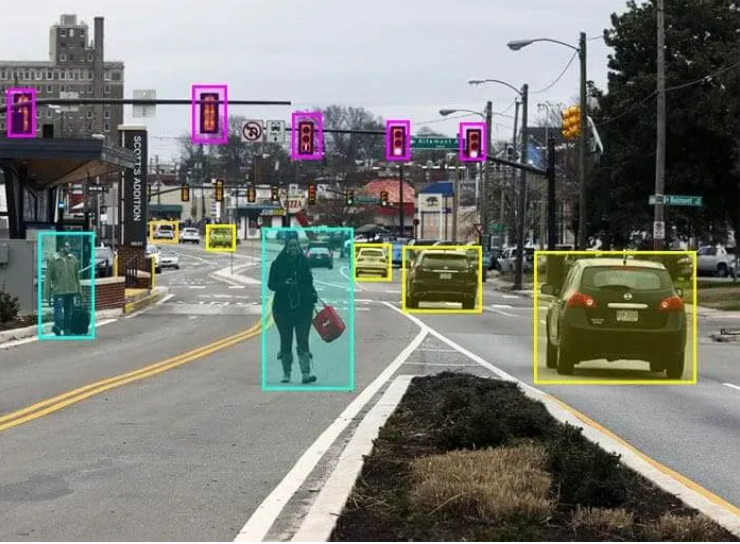

# **Popular VQA Models**

In this section, we are going to describe some common algorithms that perform VQA

# **1 - Pix2Struct**

Pix2Struct is a deep learning model that tackles visual question answering (VQA) by leveraging the power of image-to-text translation. Pix2Struct is an encoder-decoder transformer model. The ecoder part analyzes an image, breaking it down into its Visual components. On the other hand the decoder excels in comprehending and producing textual content.

Here's a deeper dive into how Pix2Struct tackles Visual Question Answering.

`Preprocessing` :- The input to Pix2Struct consists of two parts: the image itself and the question as text. Pix2Struct utilizes a technical called "variable resolution input representation" for the image. This means it doesn't resize the image to a fixed size, but instead breaks it down into smaller patches that can vary insize depending on the image content. The question is kept in its original text format.

`Joint Representation Learning` :- Unlike many VQA models that process the image and question separately. Pix2Struct takes a unique approach. It presents both the image patches and the question text simultaneously to the encoder. The encoder, a Transformer based architecture, which adapt at processing different types of inputs together. It analyzes the visual information from the image patches and the semantic meaning of the question to create a combined representation

`Reasoning and Answer Generation`:- The decoder part of Pix2Struct takes the combined representation from the encoder. By considering both the visual and textual information, the decoder reasons about the answer to the question in the context of the images.It then generates the answer as a sequence.

# **2 - BLIP-2**

BLIP-2 (Bootstrapping Language Image pre-training) is a VQA model that tackles the task with an emphasis on efficiency. Unlike some VQA models that require massive amounts of computational power, BLIP-2 achieves performance comparable to state of the art with a more streamlined approach.

BLIP-2 acts as a bridge between two pre-trained components: a frozen image encoder and a large language model (LLM). The image encoder, though not trainable in BLIP-2, is already adept at extracting visual features from images. The LLM, also pre-trained, brings its expertise in understanding and generating text. The key component in BLIP-2 is a lightweight neural network architecture called the Quering Transformer, or Q-Former for short. This clever model goes trough two stages of training:

`Representation Learning` :- In the first stage, the Q-Former is trained a common language for both the image and text representations. It essentially acts as a translator, learning to convert the visual features from the image encoder in to a format that the LLM can understand.

`Generative Learning` :- Once the Q-Former can translate between the two modalities, it undergoes a second training phase. Here, it focuses on generating text descriptions that accurately reflect the image content. This step further stengthens the connection between visual information and textual understanding.

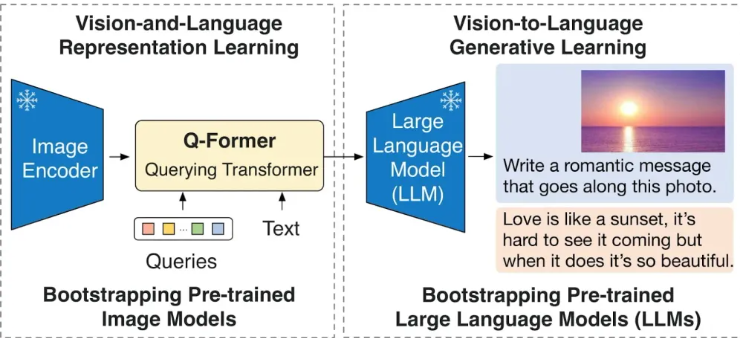



# 3- **GPT-4 With Vision**

GPT-4 with Vision, often referred to as GPT-4V, is a groundbreaking advancement in VQA.

Unlike traditional VQA models that analyze text and image separately, GPT-4 with Vision operates as a unified system.

GPT-4 with Vision incorporates a powerful text processing component based on the GPT-4 language model, known for its exceptional natural language understanding capabilities. But here's the twist: GPT-V also integrates a vision processing module that allows it to directly analyze visual features within an image.

Here is a breakdown of how GPT-4 with Vision answers questions about images:

Input Integration: An image and a question are presented as input.
Joint Representation Learning: GPT-V doesn't process them separately. Instead, it creates a combined representation where the textual information from the question and the visual features from the image are interwoven.
Reasoning and Answer Generation: Leveraging this rich multimodal representation, GPT-V reasons the answer to the question in the context of the image. It then utilizes its language expertise to generate a comprehensive textual answer.
This ability to process information jointly grants GPT-V several advantages: by considering both visual and textual cues simultaneously, GPT-V gains a richer understanding of the context behind a question. This deeper understanding allows GPT-V to generate more accurate and natural language answers compared to models relying solely on separate processing.

Other multimodal language models like Claude 3 Opus by Anthropic, CogVLM (open source), and Gemini by Google, are also capable of visual question answering.

# **Vision Question Answering Datasets**

Like many task types in natural language processing and computer vision, there are several open VQA datasets we can use in training and evaluating VQA models.

The complexity of the Visual Question Answering field necessitates datasets that are sufficiently expansive to encompass the vast array of possibilities inherent in questions and image with in real world scenarios. Many of these datasets incorporate images from the Microsoft common objects in context (COCO) featuring 320,000 images with 91 types of objects easily recognizable by a 4 year old, totaling 2.5 million labeled instances.


# **COCO-QA dataset**

The COCO-QA dataset comprises 123,287 imgages sourced from the COCO dataset, with 78.736 training and 38,948 testing Question-Answer (QA) pairs. To generate this extensive set of QA pairs, the authors employed an NLP algorithm, which automatically derived questions from COCO image captions. For instance, give a caption like, "Two chairs in a room", a question such as "How many chairs are there ?" would be generated. It is important to note that all the answers are limited to a single word.

However, this approach has some drawbacks, the questions are subject to the inherent limitations of NLP, resulting in instances where they are oddly formulated, contain grammatical errors, or are in some cases, entirely incomprehnsible.

# **DAQUAR Dataset**

DAQUAR dataset encompasses 6794 training and 5674 test question-answer pairs, derived from images with in the NYU-Depth-V2-Dataset. This results in an average of approximately 9 pairs per image.

While DAQUAR represents a commendable effort, the NYU dataset is limitted to indoor scenes, occasionally featuring challenging lighting conditions that pose difficulties in answering questions.

# **Visual QA Dataset**

In comparison to other datasets, the Visual QA dataset is considerably larger. It encompasses 204,721 images sourced from the COCO dataset and incorporates an additional 50,000 abstract cartoon images. Each image is associated with three questions, and each question has ten corresponding answers, resulting in over 760,000 questions with approximately 10 million answers.

The generation process involved a team of researchers from Amazon creating the questions and another team crafted the answers. Despite careful considerations in the dataset design, such as including popular answers to heighten the challenge of inferring question types from answer sets, certain issues have surfaced. Notably, some questions prove too subjective to have a single correct answer. In such cases, a most likely answer may be provided.

# **Detail about Visual Question Answering**

In [ ]:
!pip install transformers[torch] datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 11.5 MB/s eta 0:00:00


# **Import Libraries**

In [ ]:
import requests
from PIL import Image
import torch
from transformers import BlipProcessor, BlipForQuestionAnswering, BlipImageProcessor, AutoProcessor
from transformers import BlipConfig
from datasets import load_dataset
from torch.utils.data import DataLoader # this is our data loader
from tqdm.notebook import tqdm # progress track

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# **What are the BLIP Imports**

## **1- BLIP processor**

BLIP processor is a class that process data for the BLIP model. It would take in both text and images and prepare them in a format that the model can work with. This might involve operations like tokenizing the text, normalizing the images, and converting them into tensors.

# **2-BLIP For Question Answering**

This would be a specialized class or function with in the BLIP framework designed for question-answering tasks that involve both text and images. For example, given an image and a question like "what color is the cat ?", It would use the BLIP model to infer the answer from the image.

# **3-BLIP Image Processor**

Similar to BlipProcessor, but this one might be more focused on the image aspect of the processing. It could involve resizing images, normalization, and converting images into format expected by the BLIP model.

# **4-AutoProcessor**

This might be a class that automatically selects the correct processor like BLIP processor or BLIPImageProcessor based on the input data or task requirements. It's part of an effort to automate and streamline the data preprocessing pipeline.

# **5-BLIP Config**

This is a configuration class that holds all the settings and hyperparameters for the BLIP model. It could include things like the size of the model, vocabulary size, image resoultion etc

# **Move the data to device**

In [ ]:
device =  torch.device("cuda" if torch.cuda.is_available() else "cpu")

# **About the dataset**

**PathVQA** is a dataset of question-answer pairs on pathology images. The dataset is intended to be used for training and testing Medical Visual Question Answering (VQA) systems. The dataset includes both open-ended questions and binary "yes/no" questions. The dataset is built from two publicly-available pathology textbooks. "Textbook of pathology" and "Basic Pathology" and "a publicly-available digital library": "Pathology Education informational Resource". The copy rights of images and captions belong to the publishers and authors of these two books, and the owners of the PEIR digital library.

In [ ]:
dataset = load_dataset("flaviagiammarino/path-vqa")

In [ ]:
dataset

# **Sample Visualization**

In [ ]:
sample = dataset['train'][1] # the second image from the train folder
PIL_image = Image.fromarray(np.array(sample['image'])).convert('RGB') # standalone code that
plt.imshow(sample['image'].convert('RGB'))
print("Question:{}".format(sample['question']))
print("Answer: {}".format(sample["answer"]))

The first line retrieves the second sample from the training set of a dataset. The dataset contains images and associated questions and answers for training a model that can perform tasks like visual question and answering.

`PIL_image = Image.fromarray(np.array(sample['image'])).convert('RGB')`

This stand alone line is taking the image data from the sample, which is presumably stored as a numpy array, converting it into a PIL image object and ensuring that it is in the RGB color space. PIL (Python Image Library) is often used in Python for opening, manipulating, and saving many different image file formats.

We can't use the convert to RGB if it was numpy array, so we need to change to a PIL format.

`plt.imshow(sample['image'].convert('RGB'))`

Here we are using matplotlib to display the image.

```
# print("Question:{}".format(sample['question']))
```
This prints out the question associated with the image. The question is part of the sample and it is a string.


`print("Answer: {}".format(sample["answer"]))` :- This prints out the answer associated with the image.





In [ ]:
config = BlipConfig.from_pretrained("Salesforce/blip-vqa-base")

This code is loading a pre-trained configuration for the BLIP (Bootstrapped Language Image Pretraining) model specifically for a visual question answering (VQA) task. The "BlipConfig.from_pretrained" method is being used to download the configuration from hugging face hosted by salesforce, which is known for contribuiting to the research community with models and datasets.

`config = BlipConfig.from_pretrained("Salesforce/blip-vqa-base")`

This line is calling a method that will retrieve the pre-trained configuration file for the BLIP model with a variant of "vqa-base". This configuration file contains various parameters and architectural settings for the model, such as the number of layers, the number of attention heads, and other hyperparameters.

This configuration is essential for initializing the BLIP model correctly with the settings it was trained with. This ensures that when we load the model, it has the right architecture and parameters set up for the tasks it was designed to perform.

# **Training and Validation Dataset**

In [ ]:
train_data = dataset["train"].select(range(1000))
val_data = dataste["validation"].select(range(1000))

`train_data = dataset["train"].select(range(1000))` :- This line is selecting the first 1000 examples from the training split of a dataset. The "select" method is likely part of a dataset manipulation library, possibly the "datasets" library from Hugging Face, which is commonly used for handling large datasets in machine learning tasks. The range(1000) function generates a sequencce of numbers from 0 to 999, which are used as indices to select the corresponding entires in the dataset.

# **Build Data-Loader**

# **Build a Custom Dataset**

In [ ]:
class VQADataset(torch.utils.data.Dataset):
    def __init__(self, data, segment, text_processor, image_processor):
        self.data = data
        self.questions = data['question']
        self.answers = data['answer']
        self.text_processor = text_processor
        self.image_processor = image_processor
        self.max_length = 32
        self.image_height = 128
        self.image_width = 128

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # get image + text
        answers = self.answers[idx]
        questions = self.questions[idx]
        image = self.data[idx]['image'].convert('RGB')
        text = self.questions[idx]

        image_encoding = self.image_processor(image,
                                  do_resize=True,
                                  size=(self.image_height,self.image_width),
                                  return_tensors="pt")

        encoding = self.text_processor(
                                  None,
                                  text,
                                  padding="max_length",
                                  truncation=True,
                                  max_length = self.max_length,
                                  return_tensors="pt"
                                  )
        # # remove batch dimension
        for k,v in encoding.items():
            encoding[k] = v.squeeze()
        encoding["pixel_values"] = image_encoding["pixel_values"][0]
        # # add labels
        labels = self.text_processor.tokenizer.encode(
            answers,
            max_length= self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors='pt'
        )[0]
        encoding["labels"] = labels

        return encoding

`__init__` :- This is the initializer or constructor for the "VQADataset" class. When you create an instance of "VQADataset", you need to pass in the data (which includes questions and answers), the segment (which is used to pass the train/validation/test sets), the 'text_processor' for processing questions and the 'image_processor', for processing images. The class also initializes some attributes like the maximum text length and the dimensions to which the images should be resized.

`'__len__'` Method :- This is a special method in Python that allows python to use the len() function on instance of this class. It will return the number of items in the dataset.

`'__getitem__'` :- This method used to retriev a single item from the dataset. The idx parameter is an index specifying which example to retrieve. The method processes both the image and the question text, encoding them into a format suitable for a model to take as input.


```
image_encoding = self.image_processor(image,
                                  do_resize=True,
                                  size=(self.image_height,self.image_width),
                                  return_tensors="pt")
```
Here the image is processed by `self.image_processor`, it is resized to the dimensions specified by `self.image_height` and `self.image_width`, and the resulting tensors is formatted for PyTorch to return tensors "pt"



```
encoding = self.text_processor(
                None,
                text,
                padding="max_length",
                truncation=True,
                max_length=self.max_length,
                return_tensors="pt"
            )# This is formatted as code
```

The question text is processed using self.text_processor. The text is tokenized, padded, or truncated to a maximum length of 'self.max_length', and the tokens are converted into PyTorch tensor.


```
for k,v in encoding.items():
            encoding[k] = v.squeeze()
```

After processing, each item in the 'encoding' dictionary is squeezed. This removes any singleton dimensions (batch dimension), which is necessary since we are dealing with single examples.

`encoding["pixel_values"] = image_encoding["pixel_values"][0]`
This line takes the pixel values from the 'image encoding' which were processed earlier and adds them to the 'encoding' dictionary under the key 'pixel_values'. The [0] is used to remove the batch dimension, which is not necessary here since we are processing images one at a time.      

```
# # add labels
        labels = self.text_processor.tokenizer.encode(
            answers,
            max_length= self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors='pt'
        )[0]
        encoding["labels"] = labels

        return encoding
```

The answers are encoded using the tokenizer from the text processor. Similar to the questions, they are padded or truncated to 'self.max_length'. The result is then added to the 'encoding' dictionary under the key 'labels'. The [0] indicates that we are removing the batch dimension.


In [ ]:
text_processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
image_processor = BlipImageProcessor.from_pretrained("Salesforce/blip-vqa-base")

In [ ]:
train_vqa_dataset = VQADataset(data=train_data,
                     segment='train',
                     text_processor = text_processor,
                     image_processor = image_processor
                         )

val_vqa_dataset = VQADataset(data=train_data,
                     segment='validation',
                     text_processor = text_processor,
                     image_processor = image_processor
                         )

In [ ]:
train_vqa_dataset[0]

In [ ]:
def collate_fn(batch):
    input_ids = [item['input_ids'] for item in batch]
    pixel_values = [item['pixel_values'] for item in batch]
    attention_mask = [item['attention_mask'] for item in batch]
    labels = [item['labels'] for item in batch]
    # create new batch
    batch = {}
    batch['input_ids'] = torch.stack(input_ids)
    batch['attention_mask'] = torch.stack(attention_mask)
    batch['pixel_values'] = torch.stack(pixel_values)
    batch['labels'] = torch.stack(labels)

    return batch

# **DataLoader**

In [ ]:
train_dataloader = DataLoader(train_vqa_dataset,
                              collate_fn=collate_fn,
                              batch_size=64,
                              shuffle=False)
val_dataloader = DataLoader(val_vqa_dataset,
                            collate_fn=collate_fn,
                            batch_size=64,
                            shuffle=False)

This function takes a list of data points (batch) as input. Each data point in the batch is a dictionary with keys like 'input_ids', 'pixel_values', 'attention_mask', and 'labels', as returned by the __getitem__ method.
```
input_ids = [item['input_ids'] for item in batch]
pixel_values = [item['pixel_values'] for item in batch]
attention_mask = [item['attention_mask'] for item in batch]
labels = [item['labels'] for item in batch]
```
These lines are list comprehensions that iterate over each item in the batch and extract the respective elements, create a separate lists for 'input_ids', 'pixel_values','attention_mask' and 'labels'.

```
batch = {}
batch['input_ids'] = torch.stack(input_ids)
batch['attention_mask'] = torch.stack(attention_mask)
batch['pixel_values'] = torch.stack(pixel_values)
batch['labels'] = torch.stack(labels)

return batch
```
For each list of tensors ('input_ids', 'attention_mask', 'pixel_values', 'labels'), torch.stack is called to combine the individual tensors into a single tensor along a new dimension (the batch dimension), resulting in a batch of data ready to be inputted to a model.

`return batch`

The function returns the new batch dictionary, which now contains all the stacked tensors for each key.

In [ ]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
    print(k, v.shape)

# **Build Model**

In [ ]:
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base" )
model.to(device)

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
image_mean = image_processor.image_mean
image_std = image_processor.image_std

In [ ]:
batch_idx = 1

unnormalized_image = (batch["pixel_values"][batch_idx].cpu().numpy() * np.array(image_std)[:, None, None]) + np.array(image_mean)[:, None, None]
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)

print("Question: ",text_processor.decode(batch["input_ids"][batch_idx]))
print("Answer: ",text_processor.decode(batch["labels"][batch_idx]))
plt.imshow(Image.fromarray(unnormalized_image))

# **Model Training**

In [ ]:
model.train()
for epoch in range(90):
    print(f"Epoch: {epoch}")
    total_loss = []
    for batch in tqdm(train_dataloader):
        # get the inputs;
        batch = {k:v.to(device) for k,v in batch.items()}

        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(**batch)
        loss = outputs.loss
        total_loss.append(loss.item())
        loss.backward()
        optimizer.step()
    print("Loss:", sum(total_loss))

# **Inference**

In [ ]:
# add batch dimension + move to GPU|
for x in range(100):
    sample = val_vqa_dataset[x]
    print("Question: ",text_processor.decode(sample['input_ids'], skip_special_tokens=True))
    sample = {k: v.unsqueeze(0).to(device) for k,v in sample.items()}

    # forward pass
    outputs = model.generate(pixel_values=sample['pixel_values'],
                            input_ids=sample['input_ids'])
    print("Predicted Answer: ",text_processor.decode(outputs[0],skip_special_tokens=True))
    print("Actual Answer: ",text_processor.decode(sample['labels'][0], skip_special_tokens=True))
    #########################################################################
    unnormalized_image = (sample["pixel_values"][0].cpu().numpy() * np.array(image_std)[:, None, None]) + np.array(image_mean)[:, None, None]
    unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
    unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
    display(Image.fromarray(unnormalized_image))
    #########################################################################
    print("###################################################################")

In [ ]:
for x in range(500,600):
    sample = val_vqa_dataset[x]
    print("Question: ",text_processor.decode(sample['input_ids'], skip_special_tokens=True))
    sample = {k: v.unsqueeze(0).to(device) for k,v in sample.items()}

    # forward pass
    outputs = model.generate(pixel_values=sample['pixel_values'],
                            input_ids=sample['input_ids'])
    print("Predicted Answer: ",text_processor.decode(outputs[0],skip_special_tokens=True))
    print("Actual Answer: ",text_processor.decode(sample['labels'][0], skip_special_tokens=True))
    #########################################################################
    unnormalized_image = (sample["pixel_values"][0].cpu().numpy() * np.array(image_std)[:, None, None]) + np.array(image_mean)[:, None, None]
    unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
    unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
    display(Image.fromarray(unnormalized_image))
    #########################################################################
    print("###################################################################")

In [ ]:
idx = 700
sample = val_vqa_dataset[idx]
print("Question: ",text_processor.decode(sample['input_ids'], skip_special_tokens=True))
sample = {k: v.unsqueeze(0).to(device) for k,v in sample.items()}

# forward pass
outputs = model.generate(pixel_values=sample['pixel_values'],
                        input_ids=sample['input_ids'])
print("Predicted Answer: ",text_processor.decode(outputs[0],skip_special_tokens=True))
print("Actual Answer: ",text_processor.decode(sample['labels'][0], skip_special_tokens=True))
#########################################################################
unnormalized_image = (sample["pixel_values"][0].cpu().numpy() * np.array(image_std)[:, None, None]) + np.array(image_mean)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
plt.imshow(Image.fromarray(unnormalized_image))

In [ ]:
idx = 790
sample = val_vqa_dataset[idx]
print("Question: ",text_processor.decode(sample['input_ids'], skip_special_tokens=True))
sample = {k: v.unsqueeze(0).to(device) for k,v in sample.items()}

# forward pass
outputs = model.generate(pixel_values=sample['pixel_values'],
                        input_ids=sample['input_ids'])
print("Predicted Answer: ",text_processor.decode(outputs[0],skip_special_tokens=True))
print("Actual Answer: ",text_processor.decode(sample['labels'][0], skip_special_tokens=True))
#########################################################################
unnormalized_image = (sample["pixel_values"][0].cpu().numpy() * np.array(image_std)[:, None, None]) + np.array(image_mean)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
plt.imshow(Image.fromarray(unnormalized_image))

In [ ]:
idx = 885
sample = val_vqa_dataset[idx]
print("Question: ",text_processor.decode(sample['input_ids'], skip_special_tokens=True))
sample = {k: v.unsqueeze(0).to(device) for k,v in sample.items()}

# forward pass
outputs = model.generate(pixel_values=sample['pixel_values'],
                        input_ids=sample['input_ids'])
print("Predicted Answer: ",text_processor.decode(outputs[0],skip_special_tokens=True))
print("Actual Answer: ",text_processor.decode(sample['labels'][0], skip_special_tokens=True))
#########################################################################
unnormalized_image = (sample["pixel_values"][0].cpu().numpy() * np.array(image_std)[:, None, None]) + np.array(image_mean)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
plt.imshow(Image.fromarray(unnormalized_image))

In [ ]:
idx = 822
sample = val_vqa_dataset[idx]
print("Question: ",text_processor.decode(sample['input_ids'], skip_special_tokens=True))
sample = {k: v.unsqueeze(0).to(device) for k,v in sample.items()}

# forward pass
outputs = model.generate(pixel_values=sample['pixel_values'],
                        input_ids=sample['input_ids'])
print("Predicted Answer: ",text_processor.decode(outputs[0],skip_special_tokens=True))
print("Actual Answer: ",text_processor.decode(sample['labels'][0], skip_special_tokens=True))
#########################################################################
unnormalized_image = (sample["pixel_values"][0].cpu().numpy() * np.array(image_std)[:, None, None]) + np.array(image_mean)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
plt.imshow(Image.fromarray(unnormalized_image))

In [ ]:
idx = 770
sample = val_vqa_dataset[idx]
print("Question: ",text_processor.decode(sample['input_ids'], skip_special_tokens=True))
sample = {k: v.unsqueeze(0).to(device) for k,v in sample.items()}

# forward pass
outputs = model.generate(pixel_values=sample['pixel_values'],
                        input_ids=sample['input_ids'])
print("Predicted Answer: ",text_processor.decode(outputs[0],skip_special_tokens=True))
print("Actual Answer: ",text_processor.decode(sample['labels'][0], skip_special_tokens=True))
#########################################################################
unnormalized_image = (sample["pixel_values"][0].cpu().numpy() * np.array(image_std)[:, None, None]) + np.array(image_mean)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
plt.imshow(Image.fromarray(unnormalized_image))

In [ ]:
idx = 777
sample = val_vqa_dataset[idx]
print("Question: ",text_processor.decode(sample['input_ids'], skip_special_tokens=True))
sample = {k: v.unsqueeze(0).to(device) for k,v in sample.items()}

# forward pass
outputs = model.generate(pixel_values=sample['pixel_values'],
                        input_ids=sample['input_ids'])
print("Predicted Answer: ",text_processor.decode(outputs[0],skip_special_tokens=True))
print("Actual Answer: ",text_processor.decode(sample['labels'][0], skip_special_tokens=True))
#########################################################################
unnormalized_image = (sample["pixel_values"][0].cpu().numpy() * np.array(image_std)[:, None, None]) + np.array(image_mean)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
plt.imshow(Image.fromarray(unnormalized_image))

# **Text to Image Generation Multi Modal Using Stable Diffusion**

## **TABLE OF CONTENTS**

* What can Stable Diffusion do ?
* Diffusion Model
  * Forward Diffusion
  * Reverse Diffusion
* How tranining is done
  * Reverse Diffusion
* Stable Diffusion Model
  * Latent Diffusion Model
  * Variational Autoencoder
  * Image Resolution
  * Image upscaling
  * Why is latent space possible ?
  * Reverse diffusion in latent space
  * What is a VAE file ?
* Conditioning
  * Text Conditioning (text to image)
    * Tokenizer
    * Embedding
    * Feeding embeddings to noise predictor
    * Cross Attention
  * Other Conditionings
* Stable Diffusion step by step
  * Text to image
  * Noise Schedule
  * Image to Image
  * Inpainting
  * Depth to image

* What is Classifier Guidance Value ?
  * Classifier Guidance
  * Classifier-free guidance
    * Classifier-free guidance scale
* Stable Diffusion V1.5 vs V2
  * Model Difference
  * Training Data Difference
  * Outcome Difference
* SDXL model

  

# **What can Stable DIffusion do ?**

Stable Diffusion is a latent, text to image diffusion model that was released in 2022. Latent Diffusion Models (LDMs) operate by repeatedly reducing noise in a latent representation space and then converting that representation into a complete image.


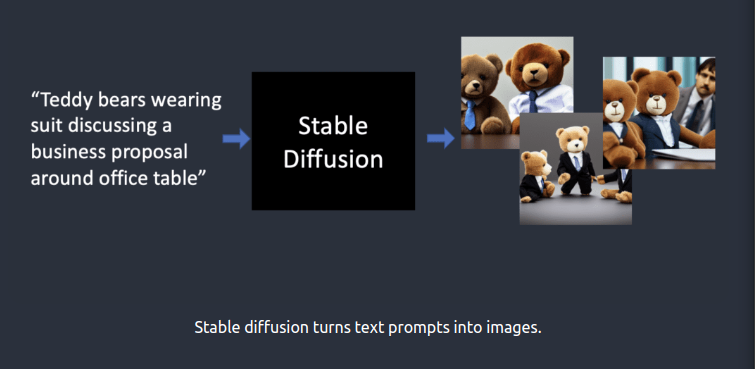

# **Diffusion Model**

Stable Diffusion belongs to a class of deep learning models called diffusion models. They are generative models, meaning they are designed to generate new data similar to what they have seen in training. In the case of stable diffusion, the data are images.

# **Imports**

In [ ]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.6 MB/s eta 0:00:00


In [ ]:
!pip install autocast

In [ ]:
import gc
import torch
from PIL import Image
import IPython.display
from torch import autocast
from tqdm.auto import tqdm
#from kaggle_secrets import UserSecretsClient
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import StableDiffusionPipeline
from diffusers import AutoencoderKL, UNet2DConditionModel
from diffusers import LMSDiscreteScheduler , PNDMScheduler


#user_secrets = UserSecretsClient()
#Hugging_face  = user_secrets.get_secret("Hugging_id")

`import gc` :- This imports Python's garbage collector interface, which allows you to release unreferenced memory manually.

`from tqdm.auto import tqdm` :- imports the automatic tqdm progress bar, which can automatically choose the approporiate interface for a given enviroment.

`from transformers import CLIPTextModel, CLIPTokenizer` :- Imports the CLIPTextModel and CLIPTokenizer from the transformers linrary by Hugging Face, which are used for working with CLIP model (Contrasitive Language-Image Pretraining)

`from diffusers import StableDiffusionPipeline` :- Imports the StableDiffusionPipeline from the 'diffusers' library, likely used for implementing a stable diffusion process, possibly in the context of generative models.

`from diffusers import AutoencoerKL, UNet2DConditionModel` :- Imports the AutoencoderKL, and UNet2DConditionalModel from the 'diffusers' library, which are parts of the architecture for certain generative models.

`from diffusers import LMSDiscreteScheduler, PNDMScheduler` :- imports the LMSDiscreteScheduler and PNDMScheduler from 'diffusers' which are scheduling algorithms used in the training or inference of diffusion models.


# **Hyper parameters**

In [ ]:
class config:
  DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
  HEIGHT = 512
  WIDTH = 512
  NUM_INFERENCE_STEPS = 500
  GUIDANCE_SCALE = 7.5
  GENERATOR = torch.manual_seed(48)
  BATCH_SIZE = 1

# **Helper Functions**

In [ ]:
def image_grid(imgs, rows, cols):
  assert len(imgs) == rows*cols
  w,h = imgs[0].size
  grid - Image.new('RGB', size = (cols*w, rows*h))
  grid_w, grid_h = grid.size
  for i, img in enumerate(imgs):
    grid.pastep(img, box=(i%cols*w, i//cols*h))
  return grid

# **Loading the Pre-trained models**

* The model we are going to use is `CompVis/stable-diffusion-v1-1`
* We are going to load `variable auto encoder` , `tokenizer`, `Text encoder` and `unet`

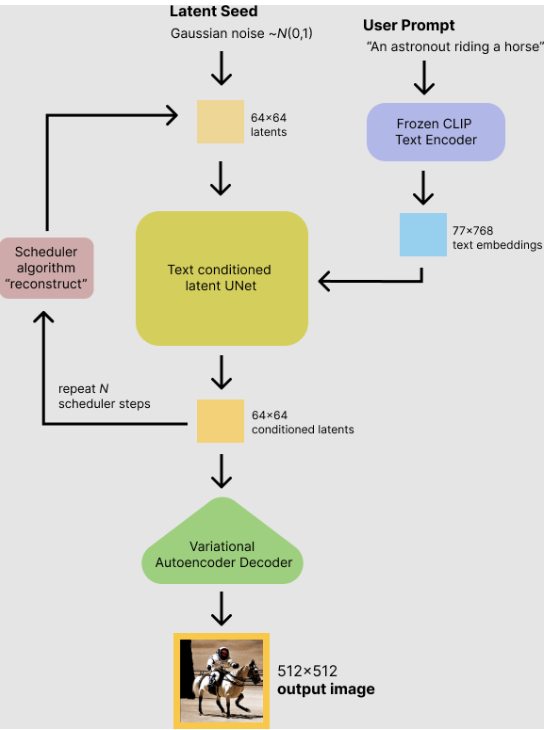

In [ ]:
vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder = "vae")
tokenizer = CLIPTokenizer.from_pretrained('openai/clip-vit-large-patch14')
text_encoder = CLIPTextModel.from_pretrained('openai/clip-vit-large-patch14')
unet = UNet2DConditionModel.from_pretrained('CompVis/stable-diffusion-v1-4', subfolder = "unet")
vae = vae.to(config.DEVICE)
text_encoder = text_encoder.to(config.DEVICE)
unet = unet.to(config.DEVICE)

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

# **Scheduler**

In [ ]:
scheduler = LMSDiscreteScheduler(beta_start = 0.00085, beta_end = 0.012, beta_schedule = 'scaled_linear', num_train_timesteps = 1000)
print("The scheduler loaded is K-LMS Scheduler")

The scheduler loaded is K-LMS Scheduler


# **First Image**

* tokenising the prompt
* text embeddings
* latent initialization

In [ ]:
prompt = ["a curious explorer discovers a massive sprawling underground city in a huge cave system. city has churches, european - style buildings and big towers, and is really far away, illuminated by dim ambient lighting. waterfalls are flowing between different levels of the city. award winning digital art, concept art, breathtaking, imaginative, detailed., 8k"]


In [ ]:
text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
max_length = text_input.input_ids.shape[-1]
with torch.no_grad():
      text_embeddings = text_encoder(text_input.input_ids.to(config.DEVICE))[0]
uncond_input = tokenizer(
    [""] * config.BATCH_SIZE, padding="max_length", max_length=max_length, return_tensors="pt"
)
with torch.no_grad():
      uncond_embeddings = text_encoder(uncond_input.input_ids.to(config.DEVICE))[0]
text_embeddings = torch.cat([uncond_embeddings, text_embeddings])
print(f'\033[94mText Embeddings shape: {text_embeddings.shape}')

Text Embeddings shape: torch.Size([2, 77, 768])


In [ ]:
latents = torch.randn(
  (config.BATCH_SIZE, unet.in_channels, config.HEIGHT // 8, config.WIDTH // 8),
  generator=config.GENERATOR,
)
latents = latents.to(config.DEVICE)

print(f'\033[94mLatent shape: {latents.shape}')

Latent shape: torch.Size([1, 4, 64, 64])


<ipython-input-22-d8d6ea6ca03d>:2: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  (config.BATCH_SIZE, unet.in_channels, config.HEIGHT // 8, config.WIDTH // 8),


# **Encoding the Image**

In [ ]:
scheduler.set_timesteps(config.NUM_INFERENCE_STEPS)
latents = latents * scheduler.sigmas[0]

In [ ]:
with autocast(config.DEVICE):
      for i, t in tqdm(enumerate(scheduler.timesteps)):

        latent_model_input = torch.cat([latents] * 2)
        sigma = scheduler.sigmas[i]
        latent_model_input = latent_model_input / ((sigma**2 + 1) ** 0.5)

        with torch.no_grad():
              noise_pred = unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample

        noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
        noise_pred = noise_pred_uncond + config.GUIDANCE_SCALE * (noise_pred_text - noise_pred_uncond)

        latents = scheduler.step(noise_pred, i, latents).prev_sample

0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/schedulers/scheduling_lms_discrete.py:398: UserWarning: The `scale_model_input` function should be called before `step` to ensure correct denoising. See `StableDiffusionPipeline` for a usage example.
  warnings.warn(


IndexError: index 501 is out of bounds for dimension 0 with size 501

# **Decoding the Image**

In [ ]:
latents = 1 / 0.18215 * latents

with torch.no_grad():
  image = vae.decode(latents).sample
print(f'\033[94mImage shape: {image.shape}')

# **Visualizing the Image**

In [ ]:
image = (image / 2 + 0.5).clamp(0, 1)
image = image.detach().cpu().permute(0, 2, 3, 1).numpy()
images = (image * 255).round().astype("uint8")
pil_images = [Image.fromarray(image) for image in images]
pil_images[0]

# **Second Image**

- tokenising the prompt
- text embeddings
- latent initialization

In [ ]:
prompt = ["a ultradetailed beautiful panting of a stylish woman with a sword, by conrad roset, greg rutkowski and makoto shinkai, trending on artstation , 8k"]

In [ ]:
text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
max_length = text_input.input_ids.shape[-1]
with torch.no_grad():
      text_embeddings = text_encoder(text_input.input_ids.to(config.DEVICE))[0]
uncond_input = tokenizer(
    [""] * config.BATCH_SIZE, padding="max_length", max_length=max_length, return_tensors="pt"
)
with torch.no_grad():
      uncond_embeddings = text_encoder(uncond_input.input_ids.to(config.DEVICE))[0]
text_embeddings = torch.cat([uncond_embeddings, text_embeddings])
print(f'\033[94mText Embeddings shape: {text_embeddings.shape}')

In [ ]:
latents = torch.randn(
  (config.BATCH_SIZE, unet.in_channels, config.HEIGHT // 8, config.WIDTH // 8),
  generator=config.GENERATOR,
)
latents = latents.to(config.DEVICE)

print(f'\033[94mLatent shape: {latents.shape}')

# **Encoding the Image**

In [ ]:
scheduler.set_timesteps(config.NUM_INFERENCE_STEPS)
latents = latents * scheduler.sigmas[0]

# **Decoding the Image**

In [ ]:
latents = 1 / 0.18215 * latents

with torch.no_grad():
  image = vae.decode(latents).sample
print(f'\033[94mImage shape: {image.shape}')

# **Visualizing the image**

In [ ]:
image = (image / 2 + 0.5).clamp(0, 1)
image = image.detach().cpu().permute(0, 2, 3, 1).numpy()
images = (image * 255).round().astype("uint8")
pil_images = [Image.fromarray(image) for image in images]
pil_images[0].save("img2.jpg")
pil_images[0]

# **Fine Tuning Stable Diffusion**

Text to image models like Stable Diffusion are conditioned to generated images given a text prompt.

Training a model can be taxing on your hardware, but if you enable gradient_checkpointing and mixed_precision it is possible to train a model on a single 24GB GPU. If you're training with larger batch sizes or want to train faster, it's better to use GPUs with more than 30GB of memory. You can reduce your memory footprint by enabling memory efficient attention with xformers. Jax/Flax training is also supported for efficient training on TPUs and GPUs, but it doesn't support gradient checkpoint, gradient accumulation or xFormers. A GPU with atleast 30GB of memory or a TPU v3 is recommended for training with Flax.  

**Question** :-

- what's gradient checking
- what is mixed precision
- what is xformers
- Why are we using them


- Understand how to fine-tune diffusion models for downstream use cases.

- Study the architecture and training process of stable diffusion models.

- Learn to adapt and fine tune stable diffusion models on our own datasets.

In [ ]:
git clone https://github.com/huggingface/diffusers

In [ ]:
pip install diffusers

To navigate to the example folder containing the training script and install the required dependencies for the script you're using

In [ ]:
cd examples/text_to_image
pip install -r requirements.txt

Accelerate is a library for helping you train on multiple GPUs/TPUs or with mixed precision. It'll automatically configure your training setup based on our hardware enviroment.

Initialize an hugging face Accelerate enviroment.

In [ ]:
accelerate config

To setup a default hugging face Accelerate enviroment without choosing any configurations:


In [ ]:
accelerate config default

or if your enviroment doesn't support an interactive shell, like a notebook, we can use

In [ ]:
from accelerate.utils import write_basic_config
write_basic_config()

# **Training Script**

The dataset preprocessing code and training loop are found in the main() function.

The train_text_image scripts starts by laoding a scheduler and tokenizer. we can choose to use a different scheduler here if we want.

In [ ]:
noise_scheduler = DDPMScheduler.from_pretrained(args.pretrained_model_name_or_path, subfolder = "scheduler")
tokenizer = CLIPTokenizer.from_pretrained(
    args.pretrained_model_name_or_path, subfolder = "tokenizer", revision = args.revision
)

Then the script loads the UNET model

In [ ]:
load_model = UNet2DConditionalModel.from_pretrained(input_dir, subfolder = "unet")
model.register_to_config(**load_model.config)
model.load_state_dict(load_model.state_dict())

Next, the text and image columns of the dataset need to be preprocessed. The tokenize caption functon handles tokenizing the inputs, and the train_transforms function specifies the type of transforms to apply to the image. Both of these functions are bundled into preprocess_train.

In [ ]:
def preprocess_train(examples):
  images = [image.convert("RGB") for image in examples[image_column]]
  examples["pixel_values"] = [train_transforms(image) for image in images]
  examples["input_ids"] = tokenize_captions(examples)
  return examples

Lastly, the diffusers training loop handles everything else. It encodes images in to latent space, adds noise to the latents, computes the text embeddings to condition on, updates the model parameters and saves and pushed the model to the Hub. If you want to learn more about how the training loop works.

# **Launch The Script**

In [ ]:
export MODEL_NAME="runwayml/stable-diffusion-v1-5"
export dataset_name="lambdalabs/pokemon-blip-captions"

accelerate launch --mixed_precision="fp16"  train_text_to_image.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --dataset_name=$dataset_name \
  --use_ema \
  --resolution=512 --center_crop --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --max_train_steps=15000 \
  --learning_rate=1e-05 \
  --max_grad_norm=1 \
  --enable_xformers_memory_efficient_attention
  --lr_scheduler="constant" --lr_warmup_steps=0 \
  --output_dir="sd-pokemon-model" \
  --push_to_hub

Once training is complete, you can use your newly trained model for inference.

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

pipeline  = StableDiffusionPipleline.from_pretrained("path/to/saved_model", torch_dtype = torch.float16,use_safetensors=True).to("cuda") )
image = pipeline(prompt = "yoda").images[0]
image.save("yoda-pokemon.png")

# **Parameter Efficient Fine Tuning (PEFT)**

Large Language Models (LLMs) based on the transformer architecture, like GPT, T5, and BERT have achieved state of the art results in various Natural Language Processing (NLP) tasks. They have also started foraying into other domains, such as Computer Vision (Vision Transformers, Stable Diffusion, Layout LM) and Audio(Whisper, XLS-R). The conventional paradigm is large scale pretraining on a generic web-scale data, followed by fine tuning to downstream tasks. Fine-Tuning these pre-trained LLMs on downstream datasets results in huge performance gains when compared to using the pre-trained LLMs out of the box (Zero-shot inference, for example)

However, as model gets larger and larger, full fine-tuning becomes infeasible to train on consumer hardware. In addition, storing and deploying fine tuned models independently for each downstream task becomes very expensive, because fine-tuned models are the same size as the original pre-trained model. Parameter Efficient Fine-Tuning (PEFT) approaches are meant to address both problems.

`Question :- How does the fine tuned models has the same size as the original pre-trained models ? `

Fine tuned models have the same size as the original pre-trained models primarily due to the underlying architecture and parameter retention during fine-tuning process.

`Model Architecture Retention` :- When pre-trained models is fine-tuned, the architecture of the model (that is the layers, their types, and the connections between them) remains unchanged.This includes includes the same number of layers, the same type of layers (e.g convolutional, recurrent, transformer blocks), and the same connectivity patterns.

`'Parameter Retention' `:- The primary feature of fine-tuning is that it starts with the weights and biases of the pre-trained model. These parameters are already optimized to capture a broad understanding of the data (like language understanding in the case of language models or feature recognition in vision models). During fine-tuning, most or all of these parameters are slightly adjusted or entirely retained to specialize towards a specific task. The total count of parameters (weights and biases) thus remains the same as in the original model.

`'Gradient Update'` :- In fine-tuning, although the model parameters are updated, this update involves only slight modifications to the existing weights based on the gradients computed from the new task-specific data. The update rule typically involves backpropagation, where graidients are calculated for a loss function that is now tailored to a new task. Despite these updates, the dimensionality and the structure of the weight matrices and bias vectors do not change.


`Memory and Storage Requirements ` :- Since the architecture and the total number of parameters remain unchanged, the storage requirements for the fine-tuned model are the same as for the origial pre-trained model. This means that fine tuning does not redue the computational or memory footprint of the model, which is why deploying multiple fine-tuned versions of large models can become resource-intensive.

PEFT approaches only fine-tune a smaller of (extra) model parameters while freezing most parameters of the pre-trained LLMs there by greatly decreasing the computational and storage costs. This also overcomes the issues of catastrophic forgetting, a behaviour observed during the full finetuning of LLMs. PEFT approaches have also shown to be better than fine-tuning in the low-data regimes and generalize better to out of domain scenarios. It an be applied to various modalities example, image classification and stable diffusion dreambooth.

It also helps in portability where in users can tune models using PEFT methods to get tiny checkpoints worth a few MBs compared to the large checkpoints of full fine tuning. For example, e.g., bigscience/mt0-xxl takes up 40GB of storage and full fine tuning will lead to 40GB checkpoints for each downstream datasets where as using PEFT methods it would be just a few MBs for each downstream dataset all the while achieving comparable performance to full fine tuning. The small trained weights from PEFT approches are added on top of the pre-trained LLM. So the same LLM can be used for multiple tasks by adding small weights without having to replace the entire model.

In short, PEFT approaches enable you to get performance comparable to full fine-tuning while only having a small number of trainable parameters.



Now we are excited to introduce the hugging face PEFT library , which provides the latest parameters efficient fine tuning techniques seamlessly integrated with Hugging Face Transformers and Hugging Face Accelerate. This enables using the most popular and performant models from transformers coupled with the simiplicity and scalability of Accelerate. Below are the currently supported PEFT models.

- LoRA: LORA: LOW-RANK ADAPTATION OF LARGE LANGUAGE MODELS
- Prefix Tuning: P-Tuning v2: Prompt Tuning Can Be Comparable to - Fine-tuning Universally Across Scales and Tasks
- Prompt Tuning: The Power of Scale for Parameter-Efficient Prompt Tuning
P-Tuning: GPT Understands, Too


# **Usecases**

- We explore many interesting use cases here. These are a few of the most interesting ones:

- Using 🤗 PEFT LoRA for tuning bigscience/T0_3B model (3 Billion parameters) on consumer hardware with 11GB of RAM, such as Nvidia GeForce RTX 2080 Ti, Nvidia GeForce RTX 3080, etc using 🤗 Accelerate's DeepSpeed integration: peft_lora_seq2seq_accelerate_ds_zero3_offload.py. This means you can tune such large LLMs in Google Colab.

- Taking the previous example a notch up by enabling INT8 tuning of the OPT-6.7b model (6.7 Billion parameters) in Google Colab using 🤗
 PEFT LoRA and bitsandbytes:Open In Colab

- Stable Diffusion Dreambooth training using 🤗 PEFT on consumer hardware with 11GB of RAM, such as Nvidia GeForce RTX 2080 Ti, Nvidia GeForce RTX 3080, etc. Try out the Space demo, which should run seamlessly on a T4 instance (16GB GPU): smangrul/peft-lora-sd-dreambooth.

# **Training our model using 🤗PEFT**

Let's consider the case of fine-tuning bigscience/mt0-large using LoRA.

# **Imports**

In [ ]:
from transformers import AutoModelFor2SeqLM
from peft import get_peft_model, LoraConfig, TaskType
model_name_or_path = 'bigscience/mto-large'
tokenizer_name_or_path = 'bigscience/mt0-large'

## **Creating config corresponsing to the PEFT method**

In [ ]:
peft_config = LoraConfig(
    task_type = TaskType.SEQ_2_SEQ_LM, inference_mode = False, r = 8,lora_alpha = 32, lora_dropout = 0.1
)

### **Wrapping base 🤗Transformers model by calling get_peft_model**

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained(model_name_or_path)
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()
# output trainable params: 2359296 || all params : 1231940608 || trainable% = 0.1915

## **Save the model for Model Inference**

In [ ]:
model.save_pretrained("output_dir")

This will only save the incremental PEFT weights that were trained. For example, we can find the bigscience/TO_3B tuned using LoRA on the twitter complaints raft dataset. `smangrul/twitter_complaints_bigscience_T0_3B_LORA_SEQ_2_SEQ_LM.` Notice that it only contains 2 files: adapter_config.json and adapter_model.bin with the latter being just 19MB.

## **Load For Inference**

In [ ]:
from transformers import AuotoModelForSew2SeqLM
from peft import PeftModel, PeftConfig
peft_model_id = "smangrul/twitter_complaints_bigscience_T0_3B_LORA_SEQ_2_SEQ_LM"
config = PeftConfig.from_pretrained(peft_model_id)
model = AutoModelForSeq2SeqLM.from_pretrained(config.base_model_name_or_path)
model = PeftModel.from_pretrained(model, peft_model_id)
tokenizer = AutoTokenizer.from_pretrained(config.base_model_name_or_path)

model = model.to(device)
model.eval()
inputs = tokenizer("Tweet text : @HondaCustSvc Your customer service has been horrible during the recall process. I will never purchase a Honda again. Label :", return_tensors="pt")

with torch.no_grad():
  outputs = model.generate(input_ids=inputs["input_ids"].to("cuda"), max_new_tokens=10)
  print(tokenizer.batch_decode(outputs.detach().cpu().numpy(), skip_special_tokens=True)[0])
# 'complaint'

# **Understanding pipelines, models and Schedulers**

Diffusers is designed to be a user-friendly and flexible toolbox for building diffusion systems tailored to our use-case. At the core of the toolbox are models and schedulers. While the DiffusionPipeline bundles these components together for convenience, we can also unbundle the pipleine and use the models and schedulers separately to create new diffusion systems.

No, we will see how to use models and schedulers to assemble a diffusion system for inference, starting with a basic pipeline and then progressing to the stable diffusion pipeline.

# **Deconstruct a basic pipeline**

A pipeline is a quick and easy way to run a model for inference, requiring no more than four lines of code to generate an image.

In [ ]:
from diffusers import DDPMPipeline
ddpm = DDPMPipeline.from_pretrained("google/ddpm-cat-256", use_safetensors = True).to("cuda")
image = ddpm(num_inference_steps = 25).images[0]
image

That was super easy, but how did the pipeline do that ? Let's breakdown the pipeline and take a look at what's happening under the hood.

In the example above, the pipeline contains a `UNet2DModel` model and a `DDPMScheduler`. The pipeline denoises an image by taking random noise the size of the desired output and passing it through the model several times. At each time step, the model predicts the noise residual and the scheduler uses it to predict a less noisy image. The pipeline repeats this process until it reaches the end of the specified number of inference steps.

To recreate the pipeline with the model and scheduler separately, let's write our own denoising process

# **`Load the model and scheduler`**

In [ ]:
from diffusers import DDPMScheduler, UNet2DModel
scheduler = DDPMScheduler.from_pretrained("google/ddpm-cat-256")
model = UNet2DModel.from_pretrained("google/ddpm-cat-256", use_saftensors = True).to("cuda")

set the number of timesteps to run the denoising process for

In [ ]:
scheduler.set_timestep(50)

setting the scheduler timesteps creates a tensor with evenly spaced elements in it, 50 in this example. Each element corresponds to a timestep at which the model denoises an image.